<a href="https://colab.research.google.com/github/bhuvaneswarignanasekar/ML-projects/blob/main/Hotel%20availability/hotel_availability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
pd.set_option("display.max_columns", 101)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [4]:
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [5]:
neg= data[data['yearly_availability'] == 0]
pos= data[data['yearly_availability'] == 1]
print(len(neg),len(pos))


1439 1431


In [6]:
data['reviews_per_month'].isnull().sum()

676

In [7]:
(676/2870)*100


23.554006968641115

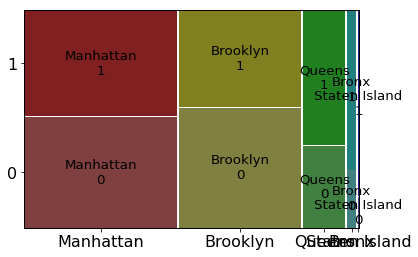

In [8]:
plt.rcParams['font.size'] = 16.0
mosaic(data, ['region', 'yearly_availability']);

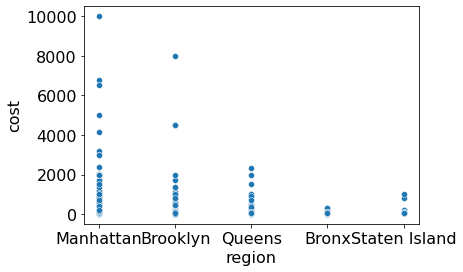

In [9]:
sns.scatterplot(x="region",y="cost",data=data)

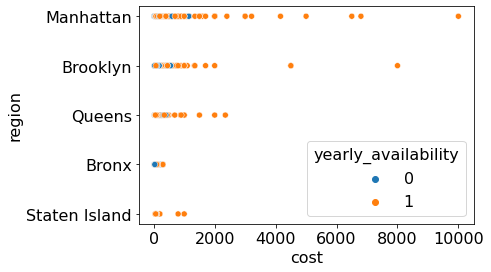

In [10]:
sns.scatterplot(data=data, x="cost", y="region", hue="yearly_availability")

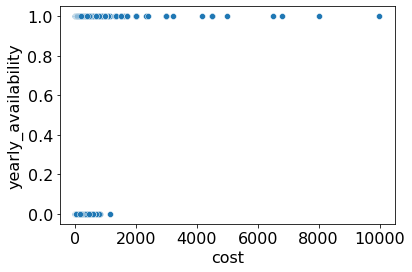

In [11]:
sns.scatterplot(x="cost",y="yearly_availability",data=data)

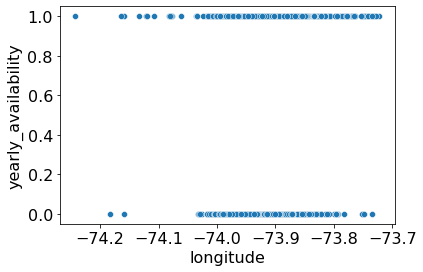

In [12]:
sns.scatterplot(x="longitude",y="yearly_availability",data=data)

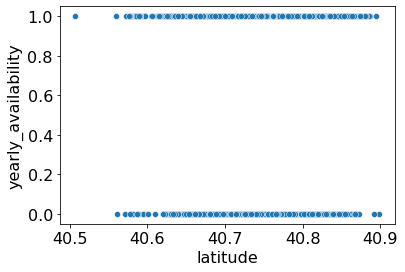

In [13]:
sns.scatterplot(x="latitude",y="yearly_availability",data=data)

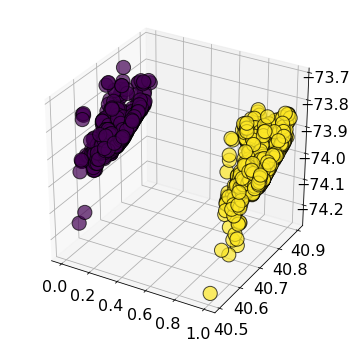

In [14]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['yearly_availability'],data['latitude'],data['longitude'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data['yearly_availability'])
plt.show()

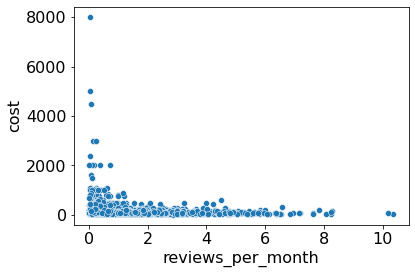

In [15]:
sns.scatterplot(x="reviews_per_month",y="cost",data=data)

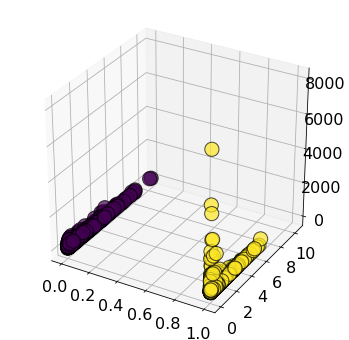

In [16]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['yearly_availability'],data['reviews_per_month'],data['cost'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data['yearly_availability'])
plt.show()

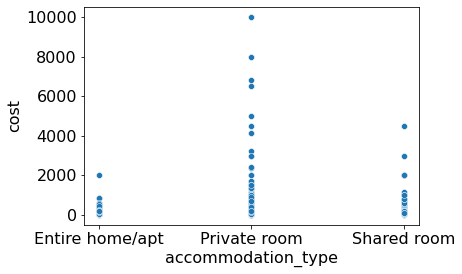

In [17]:
sns.scatterplot(x="accommodation_type",y="cost",data=data)

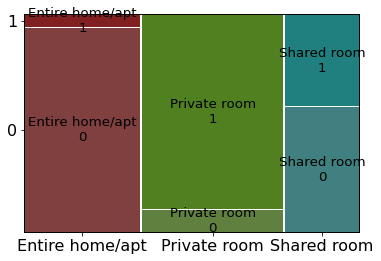

In [19]:
mosaic(data, ['accommodation_type', 'yearly_availability']);


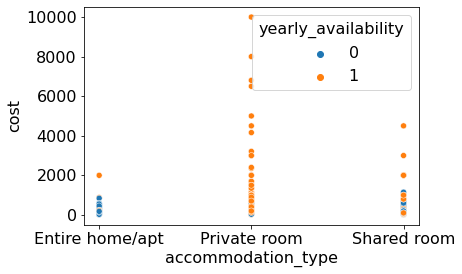

In [20]:
sns.scatterplot(data=data, x="accommodation_type", y="cost", hue="yearly_availability")

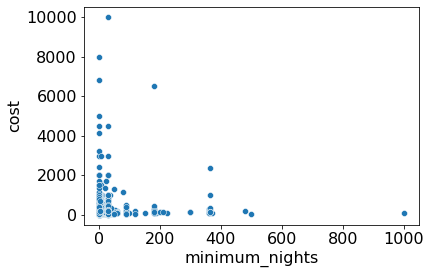

In [21]:
sns.scatterplot(x="minimum_nights",y="cost",data=data)

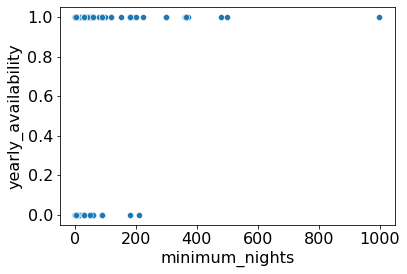

In [22]:
sns.scatterplot(x="minimum_nights",y="yearly_availability",data=data)

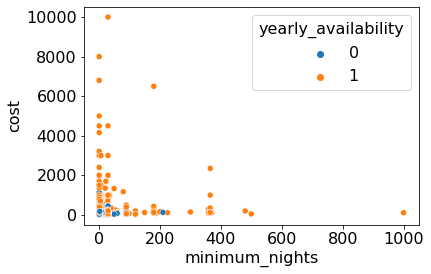

In [23]:
sns.scatterplot(data=data, x="minimum_nights", y="cost", hue="yearly_availability")

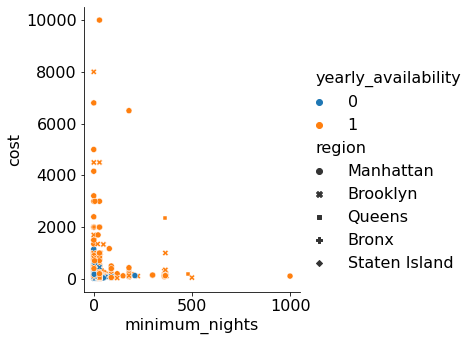

In [24]:
sns.relplot(data=data,
                x="minimum_nights",
                y="cost",
                hue="yearly_availability",
                style="region")

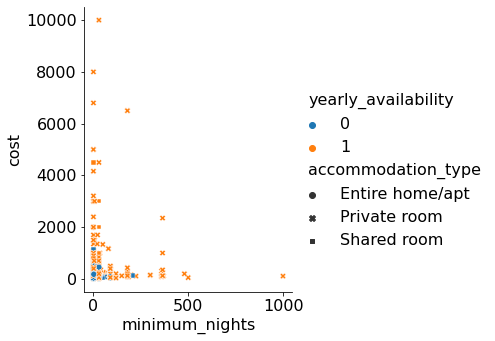

In [25]:
sns.relplot(data=data,
            x="minimum_nights", 
            y="cost",
            hue="yearly_availability",
            style="accommodation_type"
           )

In [26]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [27]:
data = pd.read_csv("train.csv")
y=data['yearly_availability']
x=data.copy()

In [28]:
x['region']=pd.factorize(data['region'])[0]
x['accommodation_type']=pd.factorize(data['accommodation_type'])[0]

In [29]:
x.drop(columns='yearly_availability', inplace=True)
x.drop(columns='reviews_per_month', inplace=True)

In [30]:
# for training and measuring performance I will split the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [32]:
print(len(X_train),len(X_test))

2583 287


In [33]:
X_train.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,owner_id,owned_hotels
1201,33769,1,40.67460,-73.94740,0,90,1,51,9541963,1
2835,33997,1,40.72100,-73.94143,1,41,30,0,178543960,10
270,34515,0,40.74564,-74.00060,0,200,1,12,17506009,1
1496,12149,0,40.76465,-73.99499,1,70,30,1,48866651,5
1427,33297,1,40.63743,-73.97229,1,67,1,10,158338077,2


In [35]:
class determine:
    def det(self,X_train,y_train,X_test,y_test):
        
        # models with whole data
        log_reg = LogisticRegression()
        nav_clf = GaussianNB()
        rand_clf = RandomForestClassifier()
        dt_clf = tree.DecisionTreeClassifier()
        grad_clf = GradientBoostingClassifier()
        models=[nav_clf,log_reg,rand_clf,dt_clf,grad_clf]
        for model in models:
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print("Train,",model) 
            print("accuracy",accuracy_score(pred,y_test))
            M = confusion_matrix(y_test, pred)
            tn, fp, fn, tp = M.ravel() 
            print(M)

In [36]:
d=determine()
d.det(X_train,y_train,X_test,y_test)

train_drop_owner=X_train.copy()
test_drop_owner=X_test.copy()
train_drop_owner.drop(['owner_id', 'number_of_reviews','owned_hotels'], axis=1, inplace=True)
test_drop_owner.drop(['owner_id', 'number_of_reviews','owned_hotels'], axis=1, inplace=True)
train_drop_loc=X_train.copy()
test_drop_loc=X_test.copy()
train_drop_loc.drop(['longitude', 'latitude'], axis=1, inplace=True)
test_drop_loc.drop(['longitude', 'latitude'], axis=1, inplace=True)
print("owner dropped","="*50)
d.det(train_drop_owner,y_train,test_drop_owner,y_test)
print("location","="*50)
d.det(train_drop_loc,y_train,test_drop_loc,y_test)



Train, GaussianNB()
accuracy 0.5470383275261324
[[82 62]
 [68 75]]
Train, LogisticRegression()
accuracy 0.5609756097560976
[[102  42]
 [ 84  59]]
Train, RandomForestClassifier()
accuracy 0.9094076655052264
[[128  16]
 [ 10 133]]
Train, DecisionTreeClassifier()
accuracy 0.8501742160278746
[[123  21]
 [ 22 121]]
Train, GradientBoostingClassifier()
accuracy 0.9024390243902439
[[127  17]
 [ 11 132]]
owner dropped ==================================================
Train, GaussianNB()
accuracy 0.6202090592334495
[[143   1]
 [108  35]]
Train, LogisticRegression()
accuracy 0.7003484320557491
[[105  39]
 [ 47  96]]
Train, RandomForestClassifier()
accuracy 0.8815331010452961
[[122  22]
 [ 12 131]]
Train, DecisionTreeClassifier()
accuracy 0.8501742160278746
[[127  17]
 [ 26 117]]
Train, GradientBoostingClassifier()
accuracy 0.8850174216027874
[[126  18]
 [ 15 128]]
location ==================================================
Train, GaussianNB()
accuracy 0.5470383275261324
[[82 62]
 [68 75]]
Train,

In [38]:
#test_data.drop(columns='reviews_per_month', inplace=True)

model = RandomForestClassifier()
model.fit(x, y)
pred = model.predict(X_test)
print(type(pred))

<class 'numpy.ndarray'>


In [39]:
idx=test_data['id']
p=pd.DataFrame(pred,columns=['prediction'])
frames = [idx,p]
df_merge_col =pd.concat(frames,axis=1)

df_merge_col.head()

,id,prediction
0,19215,1.0
1,36301,1.0
2,40566,0.0
3,33694,0.0
4,28873,0.0


In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)